# Telecom Customer Churn Prediction

# Library Importation

In [1]:
#   pip list

In [2]:
#  pip install --upgrade ydata-profiling

In [22]:
#Making necessary imports
import numpy as np  # linear algebra
import pandas as pd # data processing
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
# from ydata_profiling import ProfileReport
from xgboost import XGBClassifier

# Data Importation

In [4]:
# Loading in the Dataset
Churn =pd.read_csv("Churn.csv")

# Initial Data Analysis

In [5]:
#Checking head of dataset (first 10)
Churn.head(n=10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


In [6]:
# Checking size of dataset
Churn.shape

(7043, 38)

In [7]:
# Checking summary statistics of numerical features
Churn.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [8]:
#Checking data types of each features and the number of non-null values.
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [9]:
#Checking number of null in each column
Churn.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [10]:
# Checking data types
Churn.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [11]:
# Finding Unique values in each columns

for i in Churn.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(Churn[i].tolist()))
    print()

************************************************* Customer ID ************************************************************

{'3373-YZZYM', '2408-TZMJL', '7340-KEFQE', '2668-TZSPS', '1196-AMORA', '2541-YGPKE', '2207-QPJED', '7074-STDCN', '7982-VCELR', '4632-PAOYU', '5982-XMDEX', '5729-KLZAR', '1376-HHBDV', '6121-VZNQB', '7776-QGYJC', '6743-HHQPF', '7905-NJMXS', '4785-FCIFB', '7781-HVGMK', '4273-MBHYA', '6429-SHBCB', '3655-SNQYZ', '7872-RDDLZ', '9313-CDOGY', '6586-MYGKD', '0897-FEGMU', '1625-JAIIY', '5022-JNQEQ', '9055-MOJJJ', '3282-ZISZV', '3753-TSEMP', '1197-BVMVG', '0916-KNFAJ', '1215-FIGMP', '3635-JBPSG', '1022-RKXDR', '0103-CSITQ', '9803-FTJCG', '3941-XTSKM', '4501-EQDRN', '6791-YBNAK', '6614-YOLAC', '0531-XBKMM', '1867-TJHTS', '3978-YNKDD', '3920-HIHMQ', '0118-JPNOY', '7963-GQRMY', '3668-QPYBK', '5795-KTGUD', '2025-JKFWI', '5832-TRLPB', '4484-GLZOU', '3915-ODIYG', '6425-JWTDV', '8564-LDKFL', '4877-EVATK', '4840-ORQXB', '9801-GDWGV', '0666-UXTJO', '3703-TTEPD', '1428-IEDPR', '2656-F

In [12]:
#Checking for duplicates in dataset
Churn.duplicated().sum()

0

In [14]:
#Checking tail of dataset (last 10)
Churn.tail(n=10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
7033,9975-SKRNR,Male,24,No,0,Sierraville,96126,39.559709,-120.345639,0,...,Credit Card,18.90,18.90,0.0,0,49.51,68.41,Joined,NaN,NaN
7034,9978-HYCIN,Male,72,Yes,1,Bakersfield,93301,35.383937,-119.020428,1,...,Bank Withdrawal,84.95,4018.05,0.0,80,1987.63,6085.68,Stayed,NaN,NaN
7035,9979-RGMZT,Female,20,No,0,Los Angeles,90022,34.023810,-118.156582,0,...,Credit Card,94.05,633.45,0.0,0,255.43,888.88,Stayed,NaN,NaN
7036,9985-MWVIX,Female,53,No,0,Hume,93628,36.807595,-118.901544,0,...,Credit Card,70.15,70.15,0.0,0,42.09,112.24,Churned,Competitor,Competitor had better devices
7037,9986-BONCE,Female,36,No,0,Fallbrook,92028,33.362575,-117.299644,0,...,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned,Competitor,Competitor made better offer
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN
7042,9995-HOTOH,Male,36,Yes,0,Sierra City,96125,39.600599,-120.636358,1,...,Bank Withdrawal,59.00,3707.60,0.0,0,0.00,3707.60,Stayed,NaN,NaN


# AUTO EDA

In [15]:

# from ydata_profiling import ProfileReport
 
 
# profile = ProfileReport(Churn)
 
# # Generate the report and display it in the notebook

# profile.to_notebook_iframe()

# Exploratory Data Analysis(EDA) / Data Visualisation 

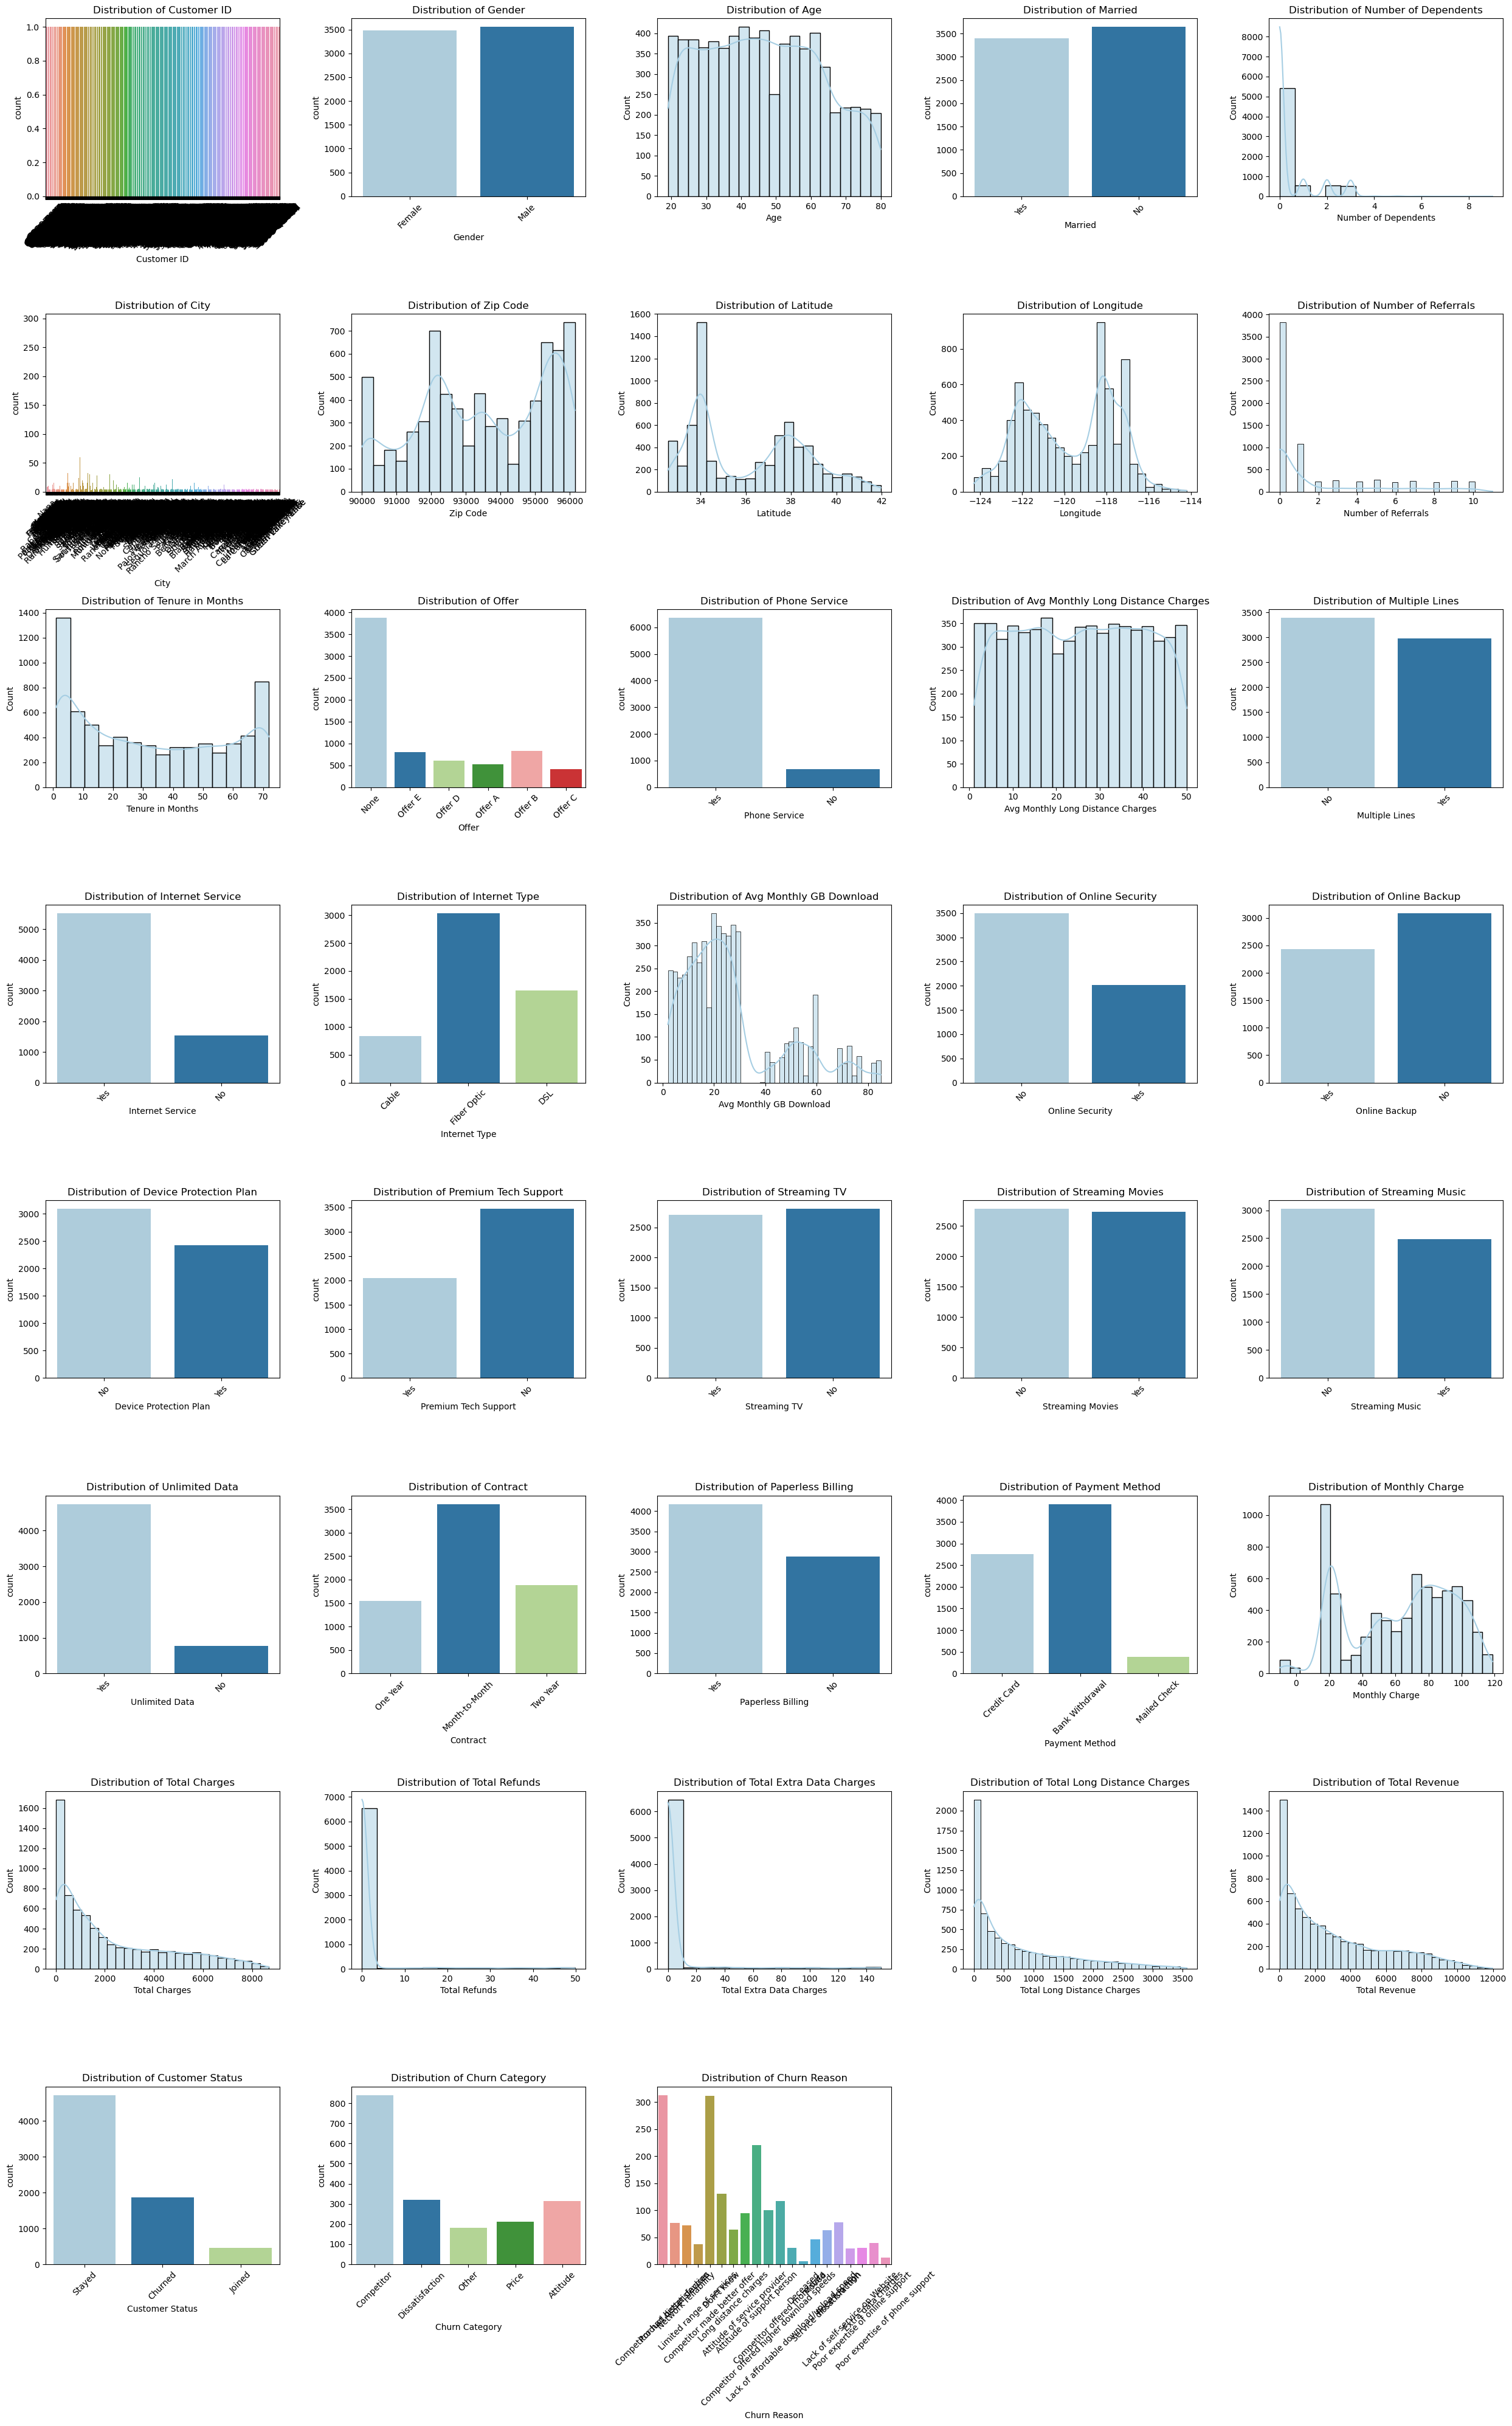

In [17]:
# Setting color palette
sns.set_palette("Paired")
# Defining the number of rows and columns for the grid
num_cols = 5
num_rows = (len(Churn.columns) + num_cols - 1) // num_cols
# Creating a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
# Flatten the axes array
axes = axes.flatten()
# Iterating over each column in the DataFrame
for i, column in enumerate(Churn.columns):
    ax = axes[i]  # Get the subplot axes
    if Churn[column].dtype == 'object':
        # Categorical variable, plot count plot
        sns.countplot(x=column, data=Churn, ax=ax)
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        # Numerical variable, plot histogram
        sns.histplot(x=column, data=Churn, kde=True, ax=ax)
    ax.set_title(f"Distribution of {column}")
# Remove empty subplots
for i in range(len(Churn.columns), num_rows * num_cols):
    fig.delaxes(axes[i])
# Adjust layout
plt.tight_layout()
# Save image to include in PDF
plt.savefig('Distribution_of_each_Feature.jpg')  
plt.show()

## Univariate Analysis

### Visualising Churn Reasons

First, the Churn Category column was allocated to a variable called churn_col. Next, I determined how many NaN variables were present in the column; in this instance, this indicates that the customers are still listed as "Stayed" (i.e., active customers). In order to determine the number of active customers and the number of churned consumers, I counted the active customers.

(The overall number of customers in the data set is 7043 <- the total number of customers who are churned, which is 5174; so, the total number of customers who are churned is equal to 7043 - 5174 = 1869 people churned).

I then determine the most frequent cause of client attrition using the df.value_counts. Plot them into a histogram next.

In [26]:
# Checking the Churn Reasons
print(Churn["Churn Category"].unique())
Churn.shape[0]

[nan 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']


7043

In [27]:
churn_col = Churn["Churn Category"]

print(pd.isnull(churn_col).sum()) # NaN in the column mean is not churned
# 5174 / 7043 = 73.5% of customers remained 
# THEREFORE 26.5% or 1869 customers churned

value_count = churn_col.value_counts()
value_count  

5174


Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: Churn Category, dtype: int64

In [24]:
fig = px.histogram(churn_col, x="Churn Category")
fig.show()

## VISUALISING RELATIONSHIP BETWEEN FEATURES AND TARGET VARIABLE